# CP467: Course Project
Chandler Mayberry (190688910) - Samson Goodenough (190723380)

In [29]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Preparing Objects
Load all object images and assign them names.

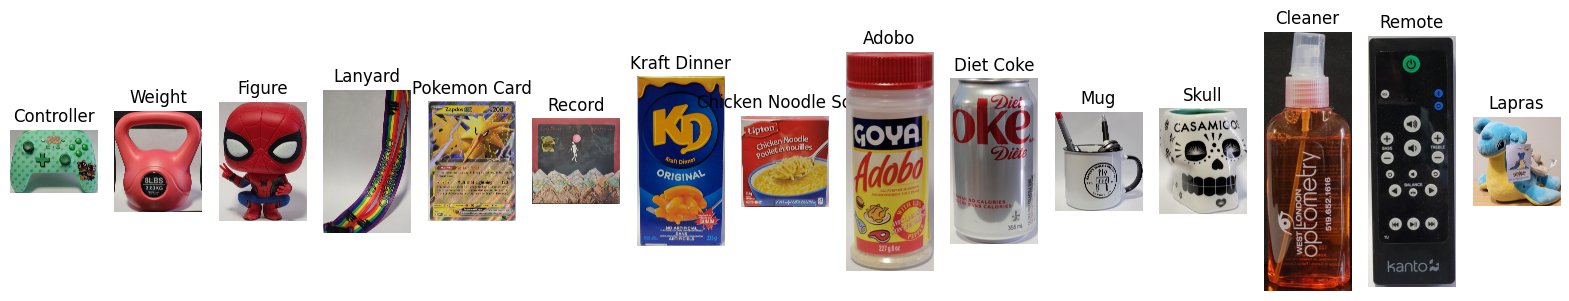

In [30]:
OBJECT_NAMES = {
  "O1.png": "Controller",
  "O2.png": "Chicken Noodle Soup",
  "O3.png": "Adobo",
  "O4.png": "Diet Coke",
  "O5.png": "Mug",
  "O6.png": "Skull",
  "O7.png": "Cleaner",
  "O8.png": "Remote",
  "O9.png": "Lapras",
  "O10.png": "Weight",
  "O11.png": "Figure",
  "O12.png": "Lanyard",
  "O13.png": "Pokemon Card",
  "O14.png": "Record",
  "O15.png": "Kraft Dinner"
}

# load in all of the images
objects = []

# use os to get all of the files in the directory
for file in os.listdir("../Objects/"):
  # read in the image
  img = cv2.imread("../Objects/" + file)
  # convert to correct color
  fixed = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # append to the list
  objects.append({"name": OBJECT_NAMES[file], "image": fixed})

# plot the images
plt.figure(figsize=(20, 20))
for i in range(len(objects)):
  # plot each with no axis and filename as title
  plt.subplot(1, len(objects), i+1)
  plt.imshow(objects[i]["image"])
  plt.axis("off")
  plt.title(objects[i]["name"])
plt.show()


## Preparing Scenes
Load all scene images and group them into the different stitchable scenes.

| Group # | Scenes    |
|---------|-----------|
| Group 1 | S1 - S6   |
| Group 2 | S7        |
| Group 3 | S8 - S14  |
| Group 4 | S15 - S19 |
| Group 5 | S20 - S21 |

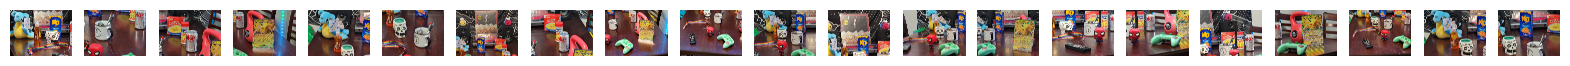

In [36]:
# load in all of the images
scenes = []

# use os to get all of the files in the directory
for file in os.listdir("../Scenes/"):
  # read in the image
  img = cv2.imread("../Scenes/" + file)
  # convert to correct color
  fixed = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # append to the list
  scenes.append(fixed)

# plot the images
plt.figure(figsize=(20, 20))
for i in range(len(scenes)):
  # plot each with no axis and filename as title
  plt.subplot(1, len(scenes), i+1)
  plt.imshow(scenes[i])
  plt.axis("off")
plt.show()


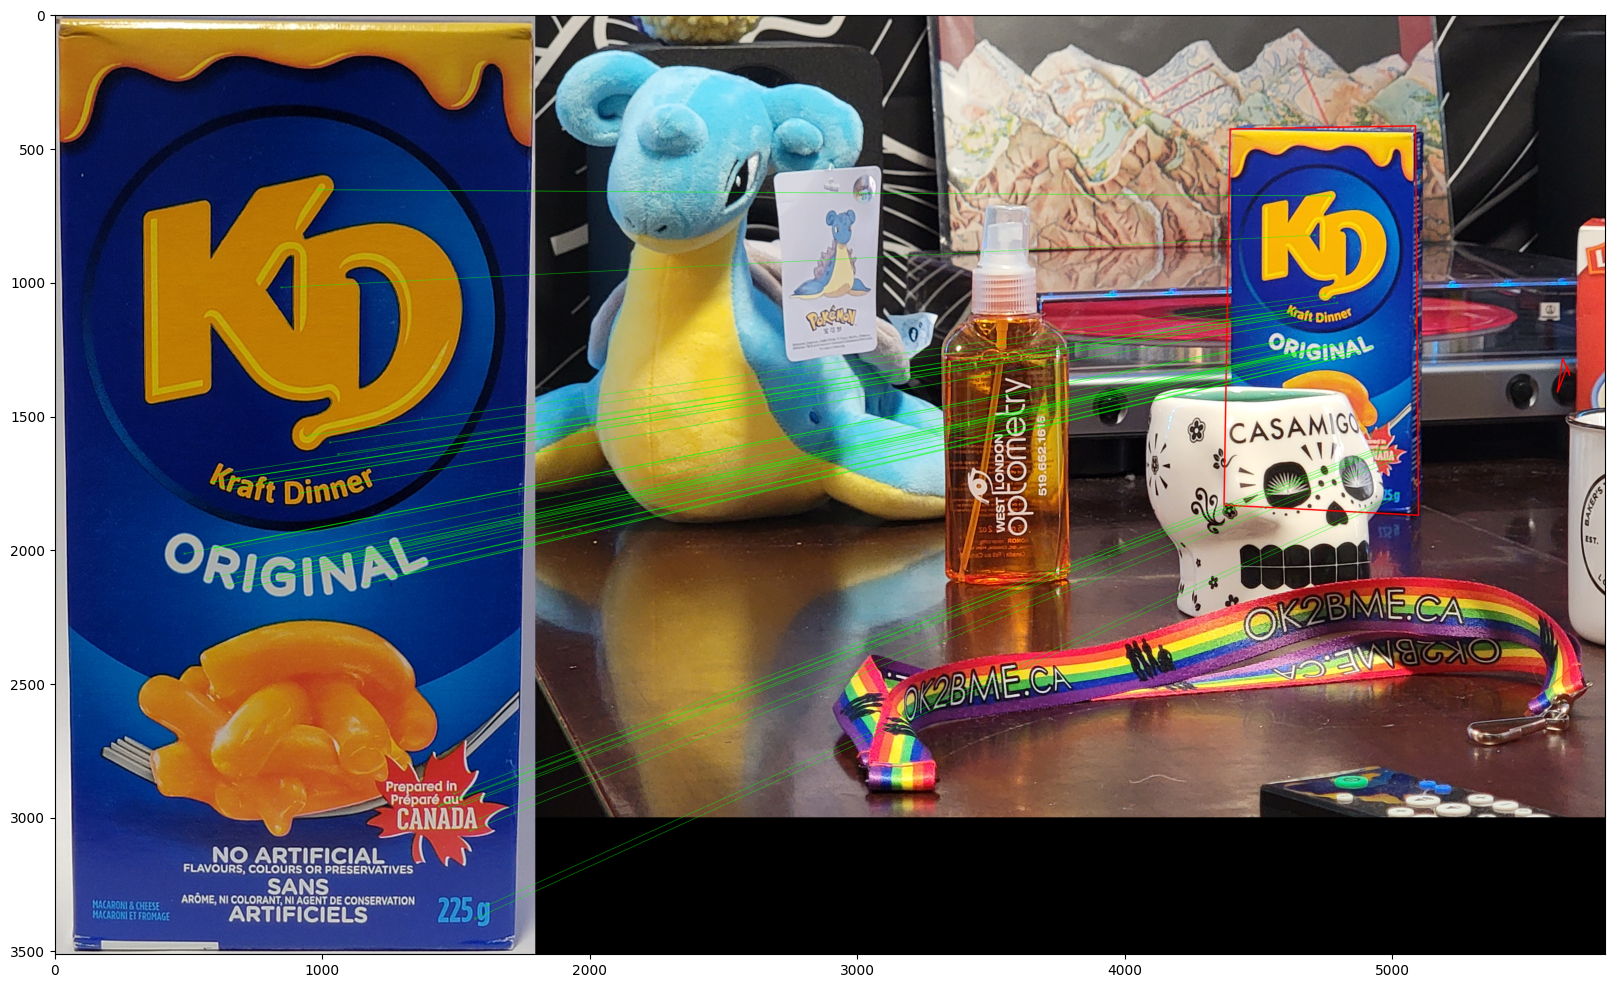

In [18]:
#https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html

#create ORB
orb = cv2.SIFT_create()
#train_object = test_training_objects[11]
train_object = cv2.imread("../Objects/O2.png")

# recolor
train_object = cv2.cvtColor(train_object, cv2.COLOR_BGR2RGB)

keypoint, descriptors = orb.detectAndCompute(train_object, None)
keypoint2, descriptors2 = orb.detectAndCompute(test_scene, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors, descriptors2, k=2)

#apply funny ratio 
good_results = []
temp = []

for m,n in matches:
    if m.distance < 0.6*n.distance:
        good_results.append([m])
        temp.append(m)


# draw box around detected image
temp = temp[:100]
src_pts = np.float32([ keypoint[m.queryIdx].pt for m in temp ]).reshape(-1,1,2)
dst_pts = np.float32([ keypoint2[m.trainIdx].pt for m in temp ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()
h, w, _ = train_object.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
img2 = cv2.polylines(test_scene,[np.int32(dst)], True, 255, 3, cv2.LINE_AA)

# label all of the scene objects
#https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576
cv2.putText(img = img2, text="Object_name", org=(int(dst[0][0][0]), int(dst[1][0][1])), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=3, color=(255, 255, 0), thickness=2, lineType=cv2.FILLED, bottomLeftOrigin = False)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(train_object, keypoint,img2,keypoint2,temp,None,**draw_params)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(img3)
plt.show()


